In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import scipy
import sklearn
%matplotlib inline

In [4]:
from tensorflow import keras
from keras.datasets import mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

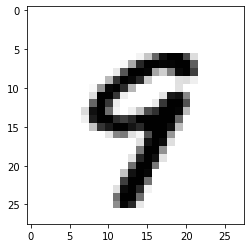

In [5]:
someNum = xTrain[727]

someNumImage = someNum.reshape(28,28)

mlt.pyplot.imshow(someNum, cmap=mlt.cm.binary, interpolation="nearest")

In [6]:
shuffle_index = np.random.permutation(60000)
xTrain,yTrain = xTrain[shuffle_index], yTrain[shuffle_index]
xTrain = xTrain.reshape(60000, 784)
xTest = xTest.reshape(10000, 784)

In [5]:
# We are checking the y set not X set
yTrain9 = (yTrain == 9)
yTest9 = (yTest == 9)

In [6]:

from sklearn.linear_model import SGDClassifier

sgdClass = SGDClassifier(random_state=42)
sgdClass.fit(xTrain, yTrain9)

SGDClassifier(random_state=42)

In [7]:
someNum.shape
someNum = someNum.reshape(784)
sgdClass.predict([someNum])

array([ True])

In [ ]:
# Cross Validation Function from Scratch (Not Needed)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for trainIndex, testIndex in skfolds.split(xTrain, yTrain9):
    cloneSGD = clone(sgdClass)
    # On the RHS we use only xTrain and yTrain9 because we are preparing folds of xTrain and yTrain9, not test arrays.
    xTrainFolds = xTrain[trainIndex]
    yTrain9Folds = yTrain9[trainIndex]
    xTestFolds = xTrain[testIndex]
    yTest9Folds = yTrain9[testIndex]

    cloneSGD.fit(xTrainFolds, yTrain9Folds)
    myPreds = cloneSGD.predict(xTestFolds)
    correctPreds = sum(myPreds == yTest9Folds)
    print(correctPreds/len(myPreds))


0.9504
0.94685
0.9499


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

class not5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self,X, y=None):
        # First is Cols, second is Rows
        return np.zeros((len(X),1), dtype=bool)
    
never5Clf = not5Classifier()
scores = cross_val_score(never5Clf, cv=3, X=xTrain, y=yTrain9, scoring="accuracy")

In [9]:
from sklearn.model_selection import  cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score

# Each row in a confusion matrix is yTrue and reach column is a yPred.
#Let the matrix be- 
# 1 2
# 3 4
# 1(TN) is Predicted non-5 and actually non 5 images 
# 2(FP) is Predicted 5 but actually non 5 images
# 3(FN) is Predicted non-5 but actually 5 images 
# 4(TP) is Predicted 5 and actually 5 images
# 1,4 are correct guesses while 2,3 are incorrect guesses

##mycvPreds = cross_val_predict(sgdClass, X=xTrain, y=yTrain9, cv=3)
##mycMatrix = confusion_matrix(yTrain9, mycvPreds)
##print(mycMatrix)
##f1Score = f1_score(yTrain9,mycvPreds)
##print(f1Score)




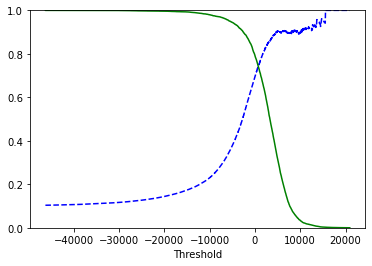

[0.10374052 0.10372489 0.1037267  ... 1.         1.         1.        ]


In [11]:
from sklearn.model_selection import  cross_val_predict
from sklearn.metrics import precision_recall_curve

scores = cross_val_predict(sgdClass, xTrain, yTrain9, cv=3, method="decision_function")
precision, recall, threshold = precision_recall_curve(yTrain9, scores) # Scores is the output of a decision function. So it is used.

def plotPrec_RecallvsThresholdCurve(precision, recall, threshold):
    mlt.pyplot.plot(threshold, precision[:-1], "b--", label="Precision")
    mlt.pyplot.plot(threshold, recall[:-1], "g-", label="Recall")
    mlt.pyplot.xlabel("Threshold")
    mlt.pyplot.ylim([0,1])

myCurve = plotPrec_RecallvsThresholdCurve(precision, recall, threshold)
mlt.pyplot.show()
print(precision)

In [12]:

from sklearn.metrics import precision_score, recall_score
yTrainPredict = (scores > 2600)
print(precision_score(yTrain9, yTrainPredict))
print(recall_score(yTrain9, yTrainPredict))


0.8357955921530636
0.5800974953773743


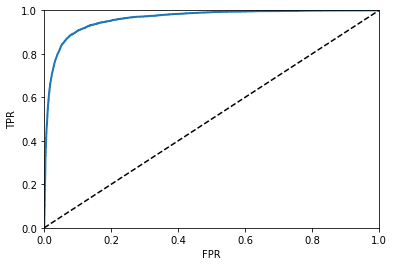

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(yTrain9,scores)

def plot_roc_curve(fpr, tpr, threshold):

    mlt.pyplot.plot(fpr,tpr, linewidth=2)
    mlt.pyplot.plot([0,1], [0,1], "k--")
    mlt.pyplot.axis([0,1,0,1])
    mlt.pyplot.xlabel("FPR")
    mlt.pyplot.ylabel("TPR")

plot_roc_curve(fpr, tpr, threshold)



FOR DECIDING BETWEEN ROC CURVE OR PRECISION-RECALL-THRESHOLD CURVE(PR Curve):-
A good rule of thumb is to prefer PR Curve when the TP class is rare or you care more about FP than FN.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
myRFC = RandomForestClassifier(random_state=42)

# This gives us an array of probabilies of each entry being the given number.
myRFCProbas = cross_val_predict(myRFC, xTrain, yTrain9, cv=3, method= "predict_proba")
yScoresRFC = myRFCProbas[:, 1]
fpr_RFC, tpr_RFC, threshold_RFC = roc_curve(yTrain9, yScoresRFC)

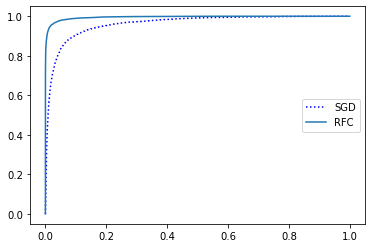

In [15]:
plt.plot(fpr,tpr, "b:", label="SGD")
plt.plot(fpr_RFC, tpr_RFC, label="RFC")
plt.legend(loc="center right")
plt.show()

In [16]:
multiClassSGD = SGDClassifier()
multiClassSGD.fit(xTrain, yTrain)

SGDClassifier()

In [17]:
someNum = xTrain[784]
someNum = someNum.reshape(784)
someNumScores = multiClassSGD.decision_function([someNum])
print(someNumScores)

[[-17045.17296668 -25950.14144743 -16304.66584929 -10830.46976796
  -29683.03626669    -70.5602107   -5687.66539255 -39191.66801196
    2453.03141691 -13579.802522  ]]


In [1]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
standardized_xTrain = stdScaler.fit_transform(xTrain)

myRFC = RandomForestClassifier()
cvs = cross_val_score(myRFC, standardized_xTrain, yTrain, cv=3, scoring="accuracy")
print(cvs)

NameError: name 'xTrain' is not defined

In [19]:
yPreds = cross_val_predict(myRFC, standardized_xTrain, yTrain, cv=3)
cfMat = confusion_matrix(yTrain, yPreds)


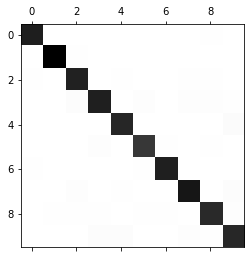

In [20]:
plt.matshow(cfMat, cmap=plt.cm.gray_r)


In [23]:
yTrainOver7 = (yTrain >= 7)
yTrainOdd = (yTrain %2 != 0)
# Remember, np.c_ concatenates like- 
# A= [1,2,3], B= [4,5,6]
# np.c_ of A and B = [1,4,2,5,3,6]
yMultilabel = np.c_[yTrainOver7, yTrainOdd]

In [30]:
from sklearn.neighbors import KNeighborsClassifier

myKNN = KNeighborsClassifier()
myKNN.fit(xTrain, yMultilabel)
someNum = xTrain[727]
myKNN.predict([someNum])


array([[ True,  True]])

In [32]:
yMultiPreds = cross_val_predict(myKNN,xTrain, yMultilabel, cv=3)
f1_score(yMultilabel, yMultiPreds, average="weighted")

0.9784583303426903